In [23]:
#!/usr/bin/env python3
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, glm


# Read the data set into a pandas DataFrame
wine = pd.read_csv('winequality-both.csv', sep=',', header=0)
wine.columns = wine.columns.str.replace(' ', '_')
print(wine.head())

  type  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0  red            7.4              0.70         0.00             1.9   
1  red            7.8              0.88         0.00             2.6   
2  red            7.8              0.76         0.04             2.3   
3  red           11.2              0.28         0.56             1.9   
4  red            7.4              0.70         0.00             1.9   

   chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8  

In [2]:
# Display descriptive statistics for all variables
print(wine.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [3]:
# Identify unique values
print(sorted(wine.quality.unique()))

[3, 4, 5, 6, 7, 8, 9]


In [4]:
# Calculate value frequencies
print(wine.quality.value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [5]:
# Display descriptive statistics for quality by wine type
print(wine.groupby('type')[['alcohol']].describe().unstack('type'))

                type 
alcohol  count  red      1599.000000
                white    4898.000000
         mean   red        10.422983
                white      10.514267
         std    red         1.065668
                white       1.230621
         min    red         8.400000
                white       8.000000
         25%    red         9.500000
                white       9.500000
         50%    red        10.200000
                white      10.400000
         75%    red        11.100000
                white      11.400000
         max    red        14.900000
                white      14.200000
dtype: float64


In [6]:
# Calculate specific quantiles
print(wine.groupby('type')[['quality']].quantile([0.25, 0.75]).unstack('type'))

     quality      
type     red white
0.25     5.0   5.0
0.75     6.0   6.0


In [7]:
# Calculate correlation matrix for all variables
print(wine.corr())

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
in_sample                  0.073540          0.092162    -0.023503   
ln_fixed_acidity    

In [10]:
# Look at relationship between pairs of variables
# Take a "small" sample of red and white wines for plotting

def take_sample(data_frame, replace=False, n=200):
	return data_frame.loc[np.random.choice(data_frame.index, replace=replace, size=n)]	
reds = wine.loc[wine['type']=='red', :]
whites = wine.loc[wine['type']=='white', :]
reds_sample = take_sample(wine.loc[wine['type']=='red', :])
whites_sample = take_sample(wine.loc[wine['type']=='white', :])
wine_sample = pd.concat([reds_sample, whites_sample])
wine['in_sample'] = np.where(wine.index.isin(wine_sample.index), 1.,0.)

reds_sample = reds.loc[np.random.choice(reds.index, 100)]
whites_sample = whites.loc[np.random.choice(whites.index, 100)]
wine_sample = pd.concat([reds_sample, whites_sample], ignore_index=True)

print(wine['in_sample'])
print(pd.crosstab(wine.in_sample, wine.type, margins=True))

0       0.0
1       0.0
2       0.0
3       1.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      1.0
20      0.0
21      1.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
6467    0.0
6468    0.0
6469    0.0
6470    0.0
6471    0.0
6472    0.0
6473    0.0
6474    0.0
6475    0.0
6476    0.0
6477    0.0
6478    0.0
6479    0.0
6480    0.0
6481    0.0
6482    0.0
6483    0.0
6484    0.0
6485    0.0
6486    0.0
6487    0.0
6488    0.0
6489    0.0
6490    0.0
6491    0.0
6492    0.0
6493    0.0
6494    0.0
6495    0.0
6496    0.0
Name: in_sample, Length: 6497, dtype: float64
type        red  white   All
in_sample                   
0.0        1399   4698  6097
1.0         200    200   400
All        1599   4898  6497


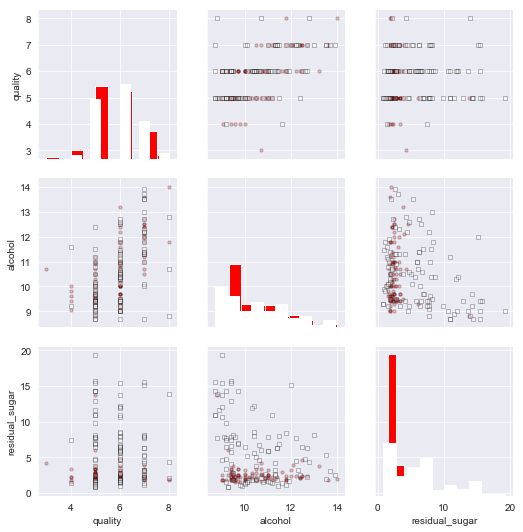

In [12]:
sns.set_style("dark")
sns.set_style("darkgrid", {"legend.scatterpoints": 0})
pg = sns.PairGrid(wine_sample, hue="type", hue_order=["red", "white"], \
palette=dict(red="red", white="white"), hue_kws={"marker": ["o", "s"]}, vars=['quality', 'alcohol', 'residual_sugar'])
pg.x = wine_sample.loc[wine_sample['type']=='red', 'quality']
pg = pg.map_diag(plt.hist)
pg.x = wine_sample.loc[wine_sample['type']=='white', 'quality']
pg = pg.map_diag(plt.hist)
pg = pg.map_offdiag(plt.scatter, edgecolor="black", s=10, alpha=0.25)
plt.show()

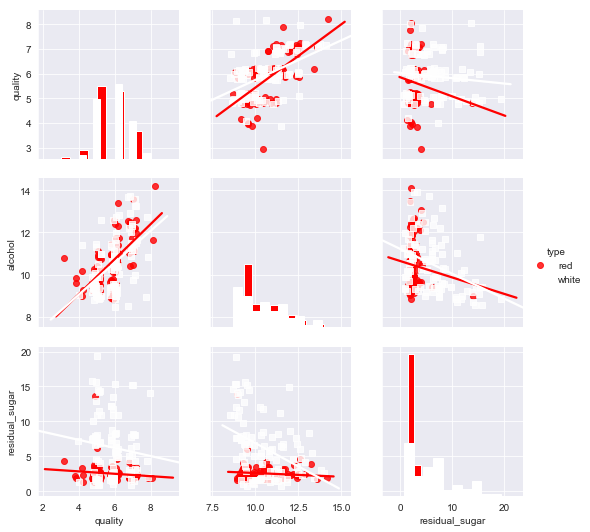

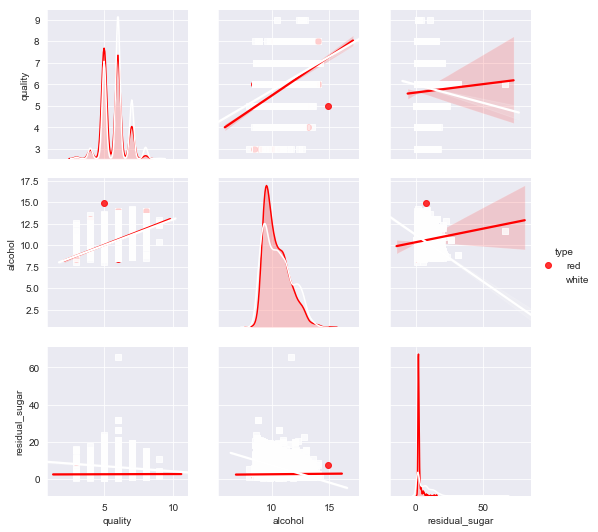

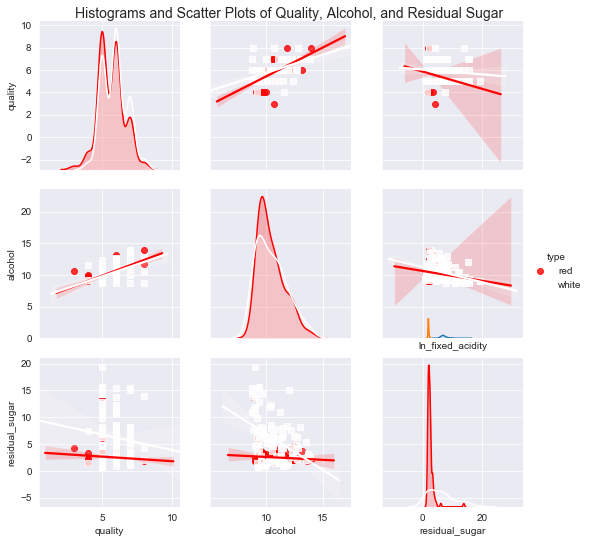

In [15]:
g = sns.pairplot(wine_sample, kind='reg', plot_kws={"ci": False, "x_jitter": 0.25, "y_jitter": 0.25}, \
hue='type', diag_kind='hist', diag_kws={"bins": 10, "alpha": 1.0}, palette=dict(red="red", white="white"), \
markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])
sns.set_style({'legend.frameon': True,'legend.numpoints': 0,'legend.scatterpoints': 0})
wine_all_plot = sns.pairplot(wine, kind='reg', hue='type', palette=dict(red="red", white="white"), markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])
wine_sample_plot = sns.pairplot(wine_sample, kind='reg', hue='type', palette=dict(red="red", white="white"), markers=["o", "s"], vars=['quality', 'alcohol', 'residual_sugar'])

wine['ln_fixed_acidity'] = np.log(wine.loc[:, 'fixed_acidity'])
sns.distplot(wine.loc[:, 'fixed_acidity'])
sns.distplot(wine.loc[:, 'ln_fixed_acidity'])
print(g)
plt.suptitle('Histograms and Scatter Plots of Quality, Alcohol, and Residual Sugar', fontsize=14, \
		horizontalalignment='center', verticalalignment='top',
		x=0.5, y=0.999)
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


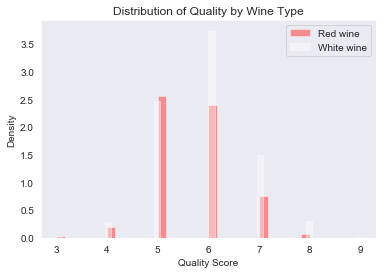

In [17]:
# Look at the distribution of quality by wine type
red_wine = wine.loc[wine['type']=='red', 'quality']
white_wine = wine.loc[wine['type']=='white', 'quality']

sns.set_style("dark")
print(sns.distplot(red_wine, \
		norm_hist=True, kde=False, color="red", label="Red wine"))
print(sns.distplot(white_wine, \
		norm_hist=True, kde=False, color="white", label="White wine"))
sns.utils.axlabel("Quality Score", "Density")
plt.title("Distribution of Quality by Wine Type")
plt.legend()
plt.show()

In [18]:
# Test whether mean quality is different between red and white wines
print(wine.groupby(['type'])[['quality']].agg(['std', 'mean']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f  pvalue: %.4f' % (tstat, pvalue))

        quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909
tstat: -9.686  pvalue: 0.0000


In [21]:
# Fit a multivariate linear regression model
#wine_standardized = (wine - wine.mean()) / wine.std()
#formula_all = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'
my_formula = 'quality ~ alcohol + chlorides + citric_acid + density + fixed_acidity + free_sulfur_dioxide + pH + residual_sugar + sulphates + total_sulfur_dioxide + volatile_acidity'
#formula_all = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol'
#formula = 'quality ~ residual_sugar + alcohol'
lm = ols(my_formula, data=wine).fit()
#lm = glm(my_formula, data=wine, family=sm.families.Gaussian()).fit()
#lm = smf.glm(formula_all, data=wine_standardized, family=sm.families.Gaussian()).fit()
print(lm.summary())
print("\nQuantities you can extract from the result:\n%s" % dir(lm))
print("\nCoefficients:\n%s" % lm.params)
print("\nCoefficient Std Errors:\n%s" % lm.bse)
print("\nAdj. R-squared:\n%.2f" % lm.rsquared_adj)
print("\nF-statistic: %.1f  P-value: %.2f" % (lm.fvalue, lm.f_pvalue))
print("\nNumber of obs: %d  Number of fitted values: %s" % (lm.nobs, len(lm.fittedvalues)))

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        17:31:36   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627 

In [22]:
# Fit a multivariate linear model with standardized independent variables
dependent_variable = wine['quality']
independent_variables = wine[wine.columns.difference(['quality', 'type', 'in_sample'])]
independent_variables_standardized = (independent_variables - independent_variables.mean()) / independent_variables.std()
wine_standardized = pd.concat([dependent_variable, independent_variables_standardized], axis=1)
lm_standardized = ols(my_formula, data=wine_standardized).fit()
print(lm_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Thu, 09 May 2019   Prob (F-statistic):               0.00
Time:                        17:32:09   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.8184 

In [27]:
# Predict quality scores for "new" observations
new_observations = wine.loc[wine.index.isin(range(10)), independent_variables.columns]
y_predicted = lm.predict(new_observations)
y_predicted_rounded = [round(score, 2) for score in y_predicted]
print(y_predicted_rounded)

[5.0, 4.92, 5.03, 5.68, 5.0, 5.04, 5.02, 5.3, 5.24, 5.69]
